In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
filepath="C:/Users/ELCOT/Desktop/pi/iris.csv"

In [5]:
df=pd.read_csv(filepath)

In [8]:
df
dataset = pd.read_csv('C:/Users/ELCOT/Desktop/pi/iris.csv') 

print(dataset) 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [9]:
df.columns=["id","sep_len","sep_wid","pet_len","pet_wid","target"]

In [10]:
df

,id,sep_len,sep_wid,pet_len,pet_wid,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df.target.replace({"Iris-setosa":"setosa","Iris-versicolor":"versicolor","Iris-virginica":"virginica"})

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [17]:
df.head()

,id,sep_len,sep_wid,pet_len,pet_wid,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.target.inplace=True

In [21]:
df

,id,sep_len,sep_wid,pet_len,pet_wid,target
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       150 non-null    int64  
 1   sep_len  150 non-null    float64
 2   sep_wid  150 non-null    float64
 3   pet_len  150 non-null    float64
 4   pet_wid  150 non-null    float64
 5   target   150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#EDA

In [23]:
df.describe()

,id,sep_len,sep_wid,pet_len,pet_wid
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
mydf=df.select_dtypes(exclude=[object])

In [33]:
mydf.corr()

,id,sep_len,sep_wid,pet_len,pet_wid
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sep_len,0.716676,1.000000,-0.109369,0.871754,0.817954
sep_wid,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
pet_len,0.882747,0.871754,-0.420516,1.000000,0.962757
pet_wid,0.899759,0.817954,-0.356544,0.962757,1.000000


In [46]:
df.target.value_counts()


target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#2D Scatterplot

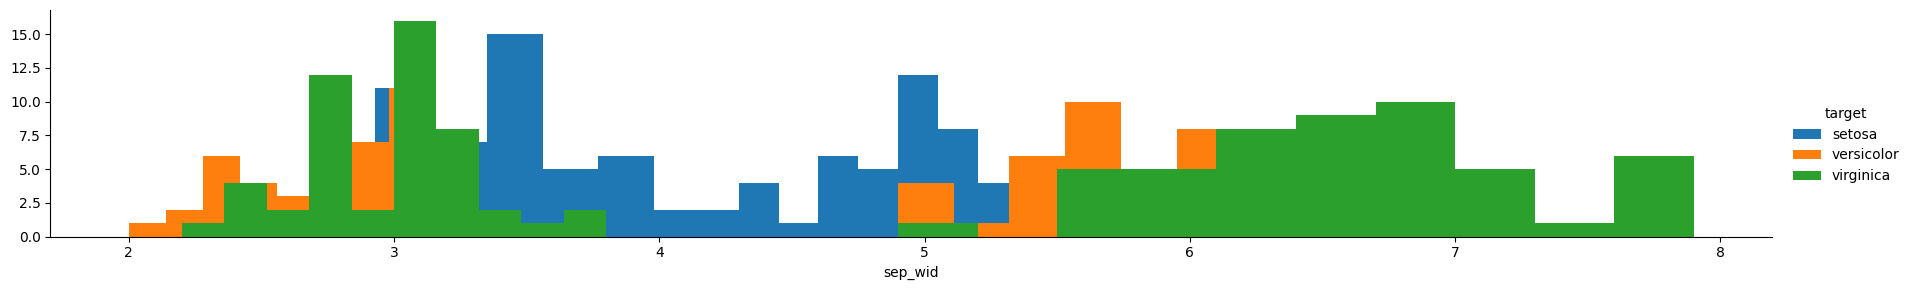

In [94]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(plt.hist,"sep_len")
facet.map(plt.hist,"sep_wid")
facet.add_legend()



#pairplot

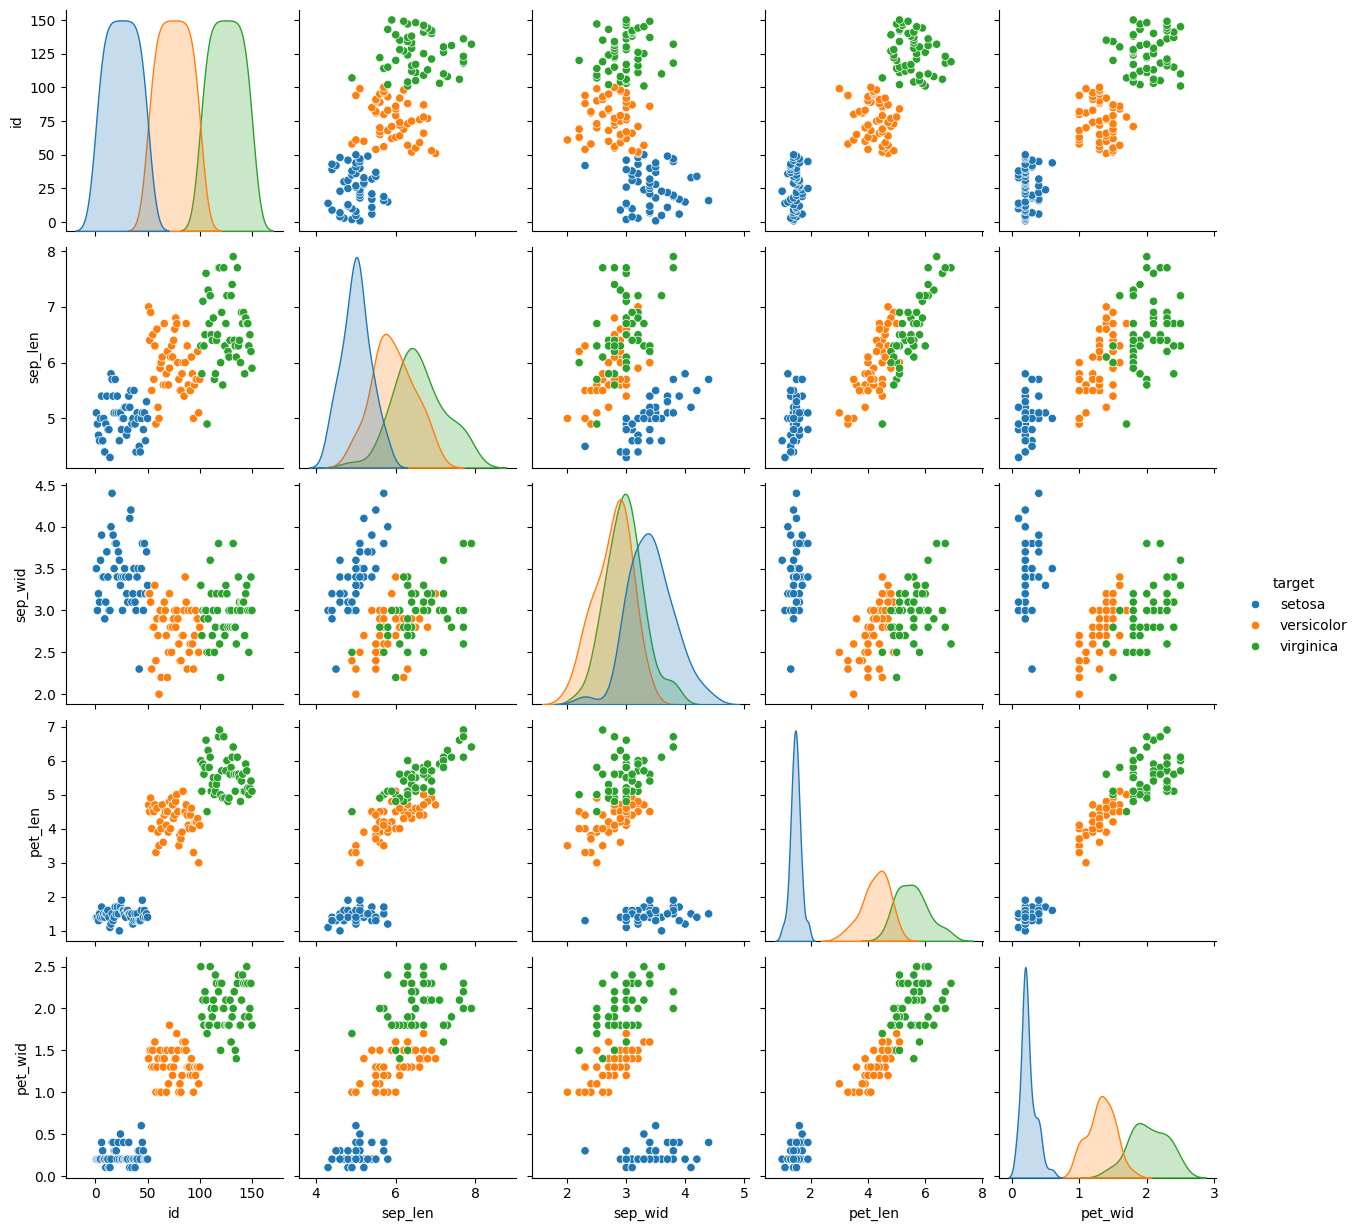

In [95]:
sns.pairplot(df,hue="target")

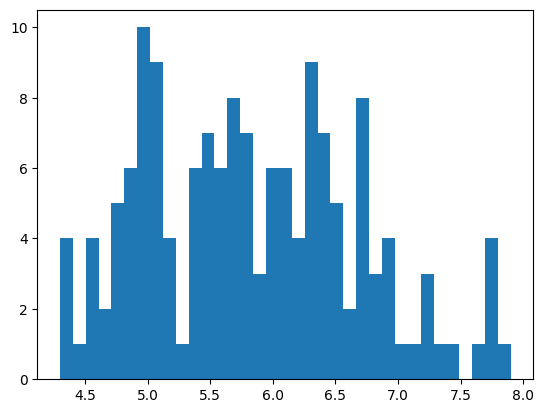

In [97]:
plt.hist(df["sep_len"],bins=35);

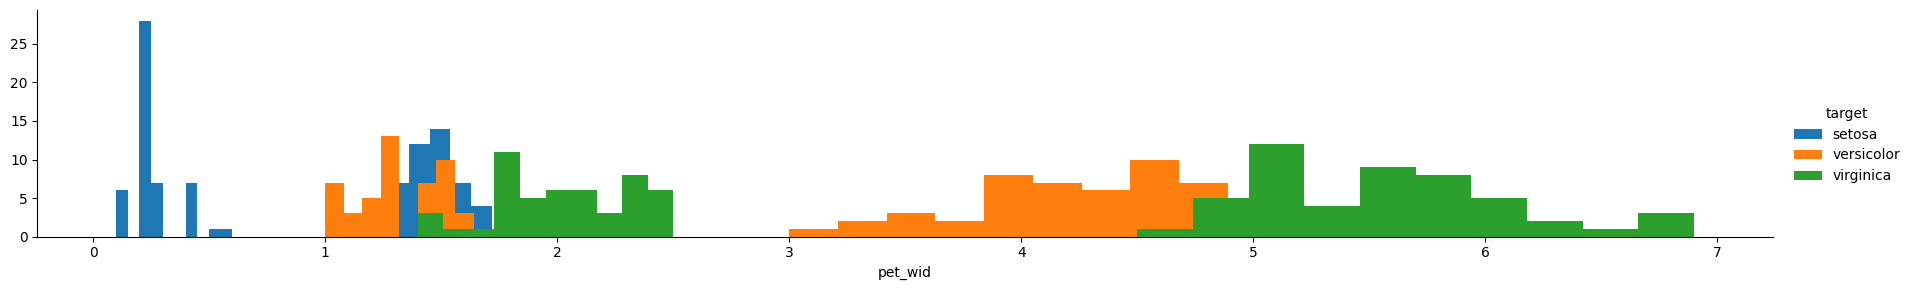

In [98]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(plt.hist,"pet_len")
facet.map(plt.hist,"pet_wid")
facet.add_legend()

C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

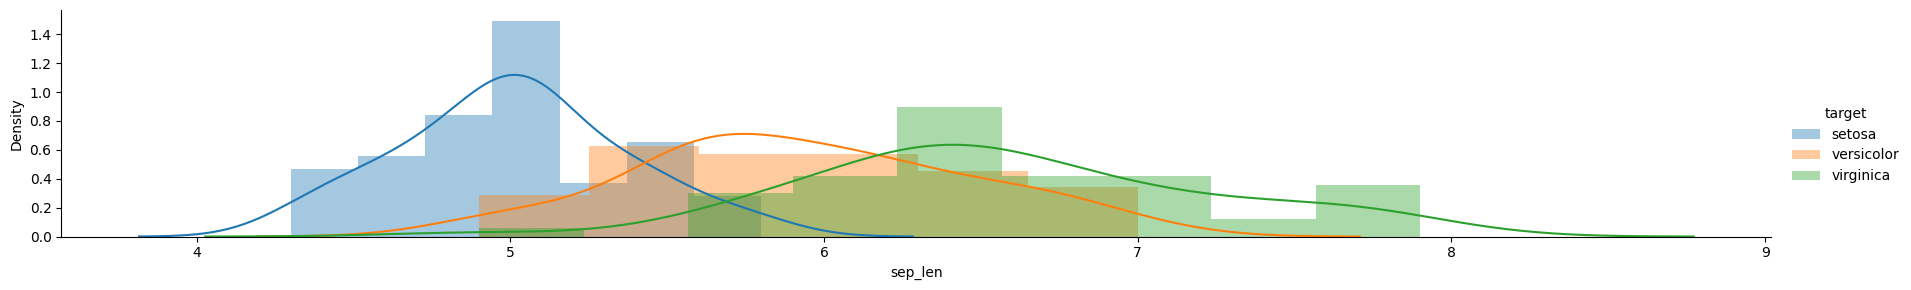

In [99]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.distplot,"sep_len")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

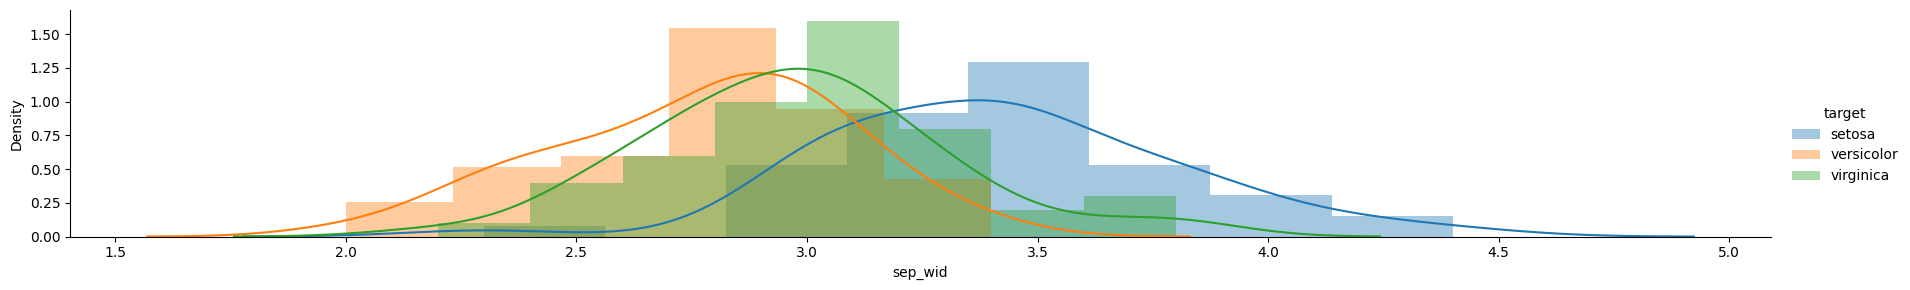

In [100]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.distplot,"sep_wid")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

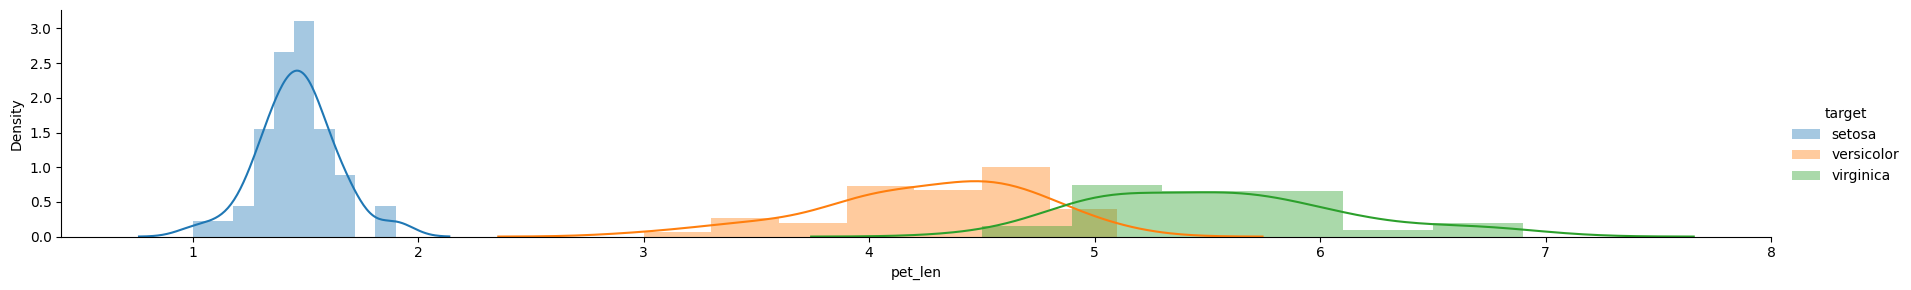

In [101]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.distplot,"pet_len")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

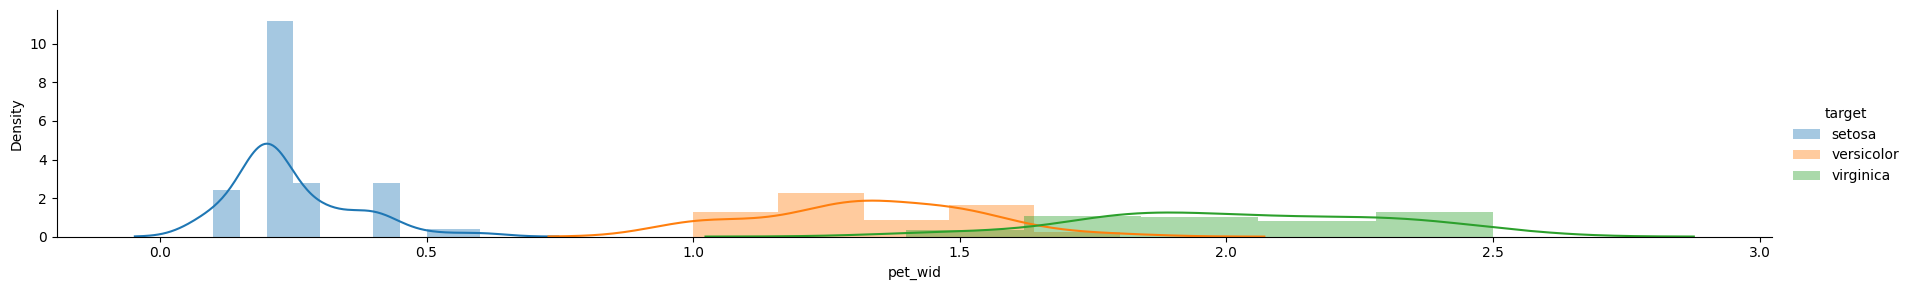

In [102]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.distplot,"pet_wid")
facet.add_legend()


#boxplot

C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


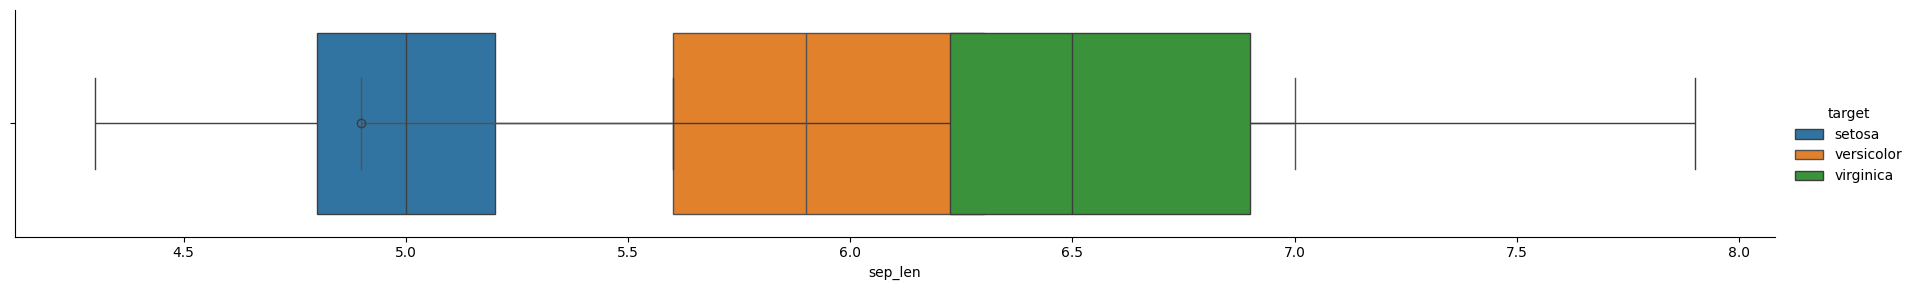

In [104]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.boxplot,"sep_len")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


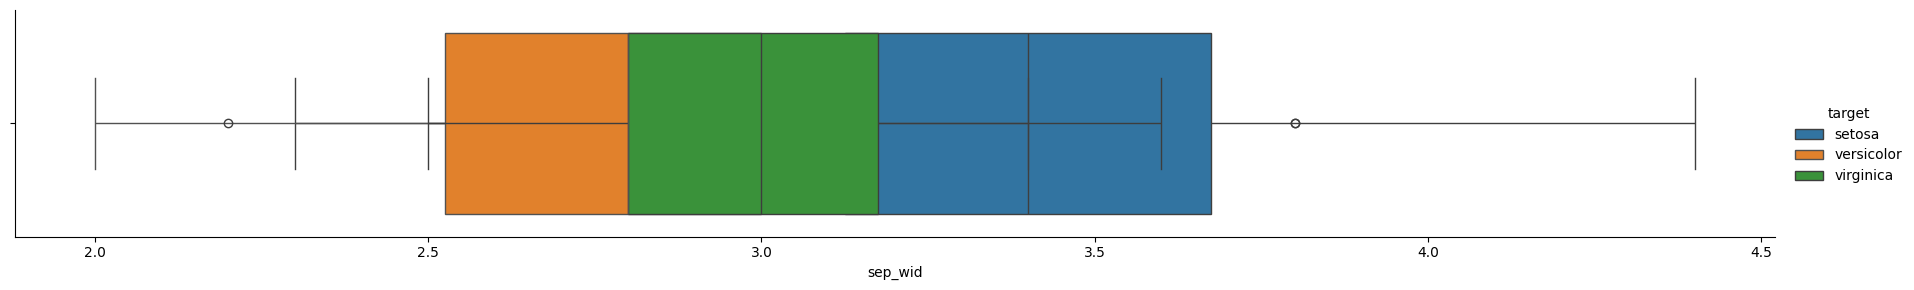

In [106]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.boxplot,"sep_wid")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


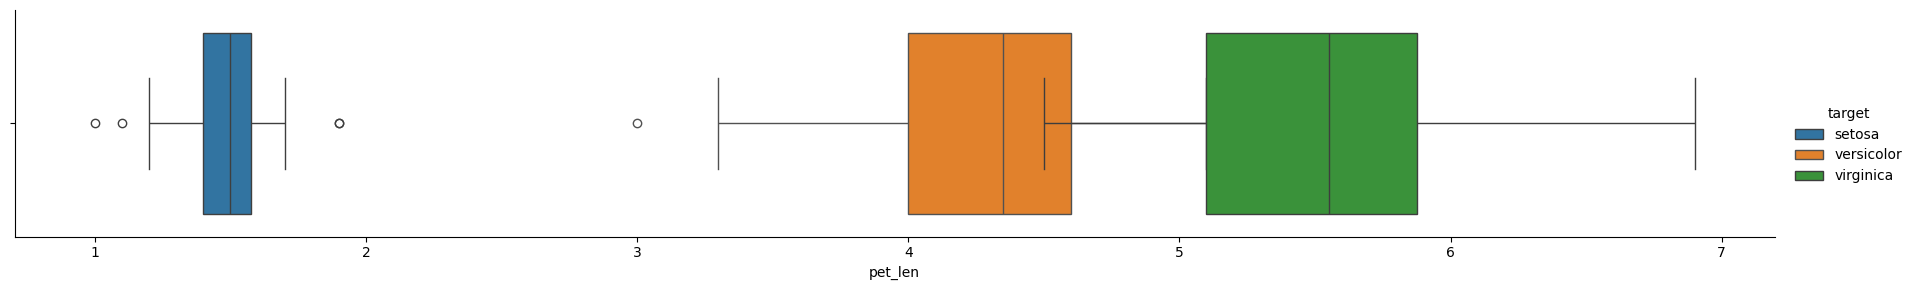

In [107]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.boxplot,"pet_len")
facet.add_legend()


C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


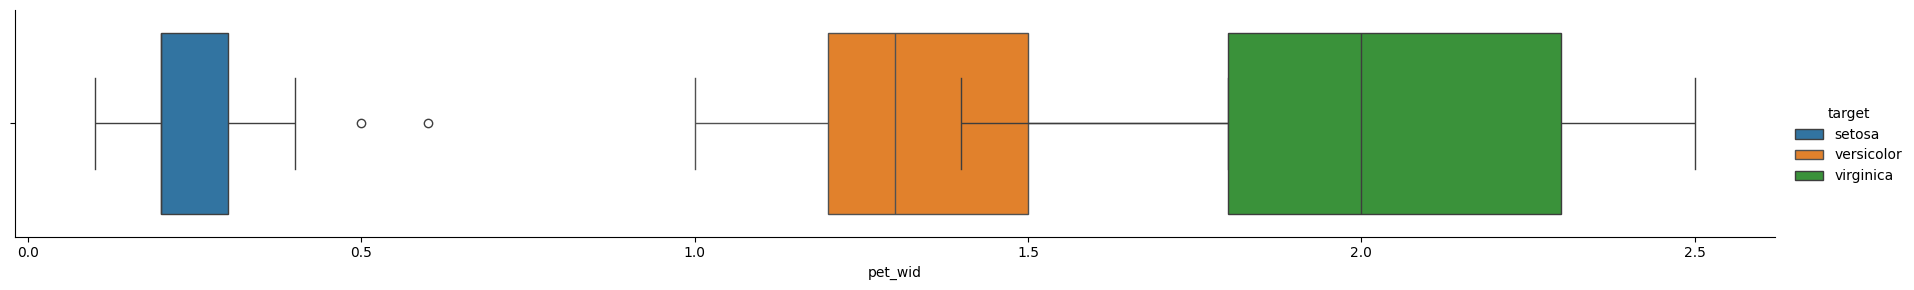

In [108]:
facet=sns.FacetGrid(df,hue="target",aspect=6)
facet.map(sns.boxplot,"pet_wid")
facet.add_legend()


#preprocessing

In [109]:
df

,id,sep_len,sep_wid,pet_len,pet_wid,target
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


#preprocessing

In [23]:
filepath="C:/Users/ELCOT/Desktop/pi/iris.csv"
df=pd.read_csv(filepath)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
mydf=df.select_dtypes(exclude=[object])
matrix=mydf.corr()

<Axes: >

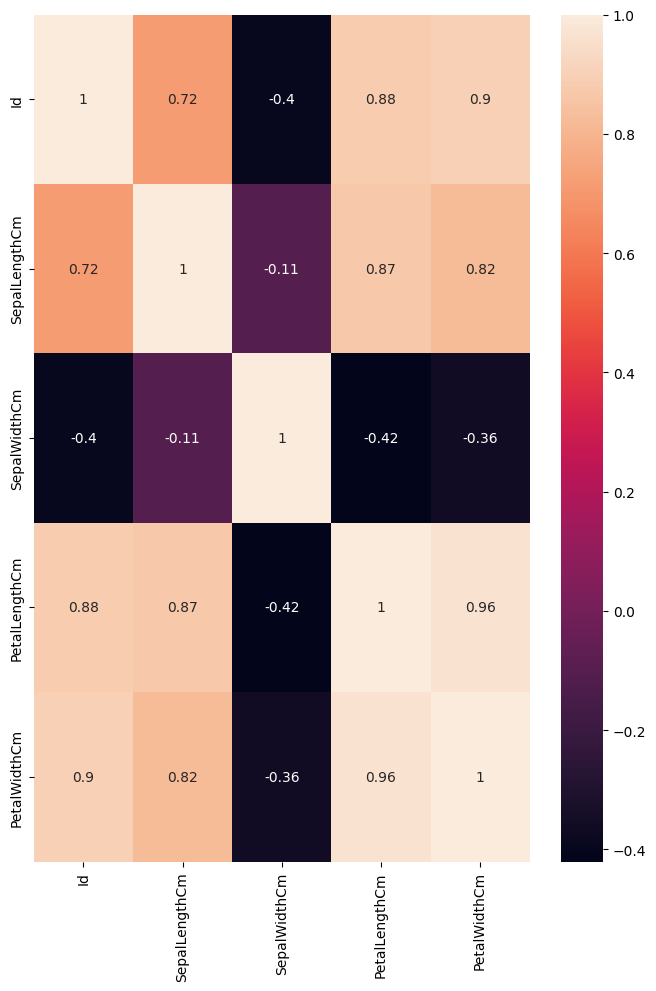

In [33]:
plt.figure(figsize=(8,11))
gi=sns.heatmap(matrix,annot=True)
gi

#model building

In [6]:
  
dataset = pd.read_csv('C:/Users/ELCOT/Desktop/pi/iris.csv') 
dataset = np.array([dataset])
print(dataset) 


[[[1 5.1 3.5 1.4 0.2 'Iris-setosa']
  [2 4.9 3.0 1.4 0.2 'Iris-setosa']
  [3 4.7 3.2 1.3 0.2 'Iris-setosa']
  [4 4.6 3.1 1.5 0.2 'Iris-setosa']
  [5 5.0 3.6 1.4 0.2 'Iris-setosa']
  [6 5.4 3.9 1.7 0.4 'Iris-setosa']
  [7 4.6 3.4 1.4 0.3 'Iris-setosa']
  [8 5.0 3.4 1.5 0.2 'Iris-setosa']
  [9 4.4 2.9 1.4 0.2 'Iris-setosa']
  [10 4.9 3.1 1.5 0.1 'Iris-setosa']
  [11 5.4 3.7 1.5 0.2 'Iris-setosa']
  [12 4.8 3.4 1.6 0.2 'Iris-setosa']
  [13 4.8 3.0 1.4 0.1 'Iris-setosa']
  [14 4.3 3.0 1.1 0.1 'Iris-setosa']
  [15 5.8 4.0 1.2 0.2 'Iris-setosa']
  [16 5.7 4.4 1.5 0.4 'Iris-setosa']
  [17 5.4 3.9 1.3 0.4 'Iris-setosa']
  [18 5.1 3.5 1.4 0.3 'Iris-setosa']
  [19 5.7 3.8 1.7 0.3 'Iris-setosa']
  [20 5.1 3.8 1.5 0.3 'Iris-setosa']
  [21 5.4 3.4 1.7 0.2 'Iris-setosa']
  [22 5.1 3.7 1.5 0.4 'Iris-setosa']
  [23 4.6 3.6 1.0 0.2 'Iris-setosa']
  [24 5.1 3.3 1.7 0.5 'Iris-setosa']
  [25 4.8 3.4 1.9 0.2 'Iris-setosa']
  [26 5.0 3.0 1.6 0.2 'Iris-setosa']
  [27 5.0 3.4 1.6 0.4 'Iris-setosa']
  [28 5.2 

X    0
y    0
dtype: int64
Mean Squared Error: 0.17509293576377635


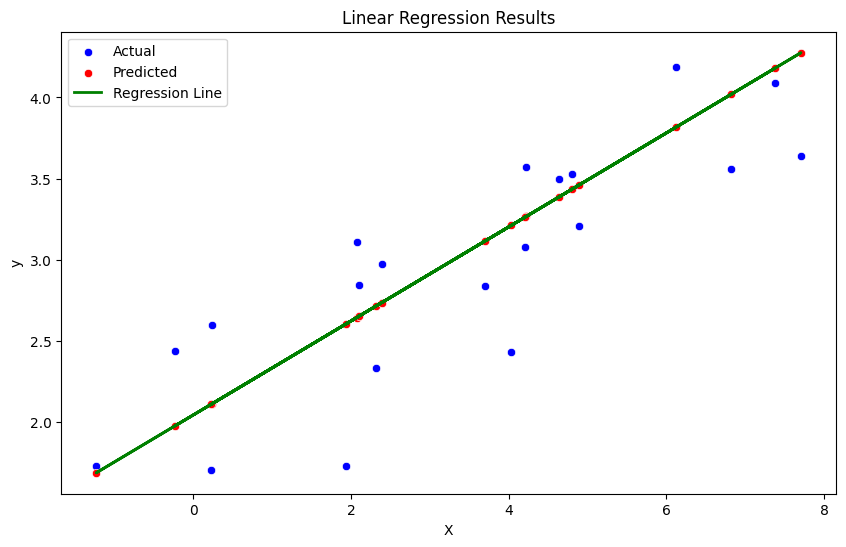

In [43]:

X = 2.5 * np.random.randn(100) + 3  
residuals = 0.5 * np.random.randn(100)  
y = 2 + 0.3 * X + residuals  


df = pd.DataFrame({'X': X, 'y': y})

print(df.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['X'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['X'], y=y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()